# Logistic Regression By Hand Coding Challenge

Logistic Regression computes the Maximum Likelihood Estimate (MLE) $p$ of the coefficients $w$ and the variable $x$.

$ p_x = \frac{1}{1+exp^{-(w^tx)}} $


The MLE method for Logistic Regression is described in psuedocode as:

```
w = [0,...,0]
for each epoch:
  p_epoch = 1/(1+e^(-w^tx))
  for each x_i:
    for each w_i:
      w_i = MLE(w_i,x_i,y_i,p_x,alpha)
```  

The maximum likelihood method `MLE` is computed: $w = w + \alpha(y-p)p(1-p)x$

Compute the Logistic Regression coefficients $w$ for the following dataset:

In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np

alpha = 0.3
epochs = 100
x = np.array([1,3])
y = np.array([0,1])
w = np.array([0.0,0.0])

def proba(x,y,w):
  return 1/(1+np.exp(-w.dot(ones(x))))

def ones(x):
  return np.column_stack((np.ones(len(x)),x))

def MLE(w,x,y,p,a):
  return w + alpha*(y-p)*p*(1-p)*x

# Use the above pseudo code to calculate w for each epoch.

# Your code here:

In [0]:
for i in range(epochs):
  p = proba(x,y,w)
  for i in range(len(x)):
    t = w.copy()
    for j in range(len(w)):
      t[j] = MLE(w[j], x[i], y[i], p[i], a)
    w = t
print(w)

[0.26592513 0.26592513]


[-18.54689001274107, 7.49179069452615]


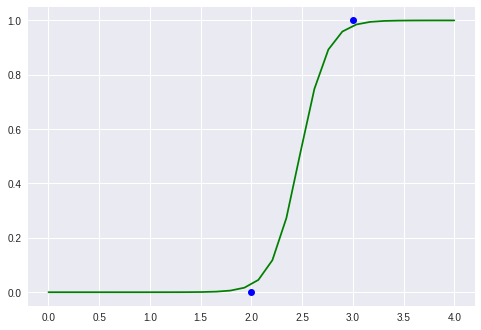

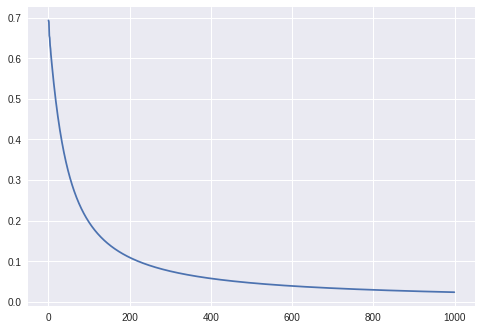

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Jlist = []
x = [2,3]
y = [0,1]

def h(xi, theta):
  xi = np.matrix(xi)
  return 1/(1 + 1/(np.exp(np.dot(xi,np.matrix(theta).T))))

def LR(x, y, theta = [0, 0], steps = 1000, alpha = 0.6):
  dt = theta.copy()
  N = len(y)
  o = np.matrix(np.ones(N))
  xM = np.hstack((o.T, np.matrix(x).T))
  
  for i in range(steps):
    J = -1/(N) * sum((y[i]*np.log(h(xM[i],theta)) + (1 - y[i]) * np.log(1 - h(xM[i],theta))) for i in range(N))
    J = J.item(0)
    Jlist.append(J)
    for j in range(N):
      dt[j] = theta[j] - alpha * sum((h(xM[k],theta).item(0) - y[k])*xM[k].item(j) for k in range(N))
    theta = dt
    
  return theta

theta = LR(x, y)
print(theta)
plt.plot(x, y, 'ob');
smooth_x = np.linspace(0,4,30)
p = theta[1] * smooth_x + theta[0]
plt.plot(smooth_x, 1/(1+np.exp(-p)), 'g');
plt.show()
plt.plot(Jlist);